In [1]:
###############################################################################
# The Institute for the Design of Advanced Energy Systems Integrated Platform
# Framework (IDAES IP) was produced under the DOE Institute for the
# Design of Advanced Energy Systems (IDAES).
#
# Copyright (c) 2018-2025 by the software owners: The Regents of the
# University of California, through Lawrence Berkeley National Laboratory,
# National Technology & Engineering Solutions of Sandia, LLC, Carnegie Mellon
# University, West Virginia University Research Corporation, et al.
# All rights reserved.  Please see the files COPYRIGHT.md and LICENSE.md
# for full copyright and license information.
#
###############################################################################

# Create a dictionary and use Txy diagrams
Author: Alejandro Garciadego  
Maintainer: Andrew Lee  
Updated: 2023-06-01  
## 1. Introduction

This notebook will do two essential things. The first is to create a property package dictionary for the Modular Property Package Framework and utilized the T-x-y diagrams for the properties. This dictionary will include parameters necessary for the sub-libraries of the property package. For example, it has critical properties required for vapor-liquid equilibrium and heat capacity parameters to calculate enthalpy and entropy. The property parameter dictionary can be later used to generate models and flowsheets.

Secondly, we will utilize this dictionary to create a model and print a T-x-y diagram using IDAES.

### 1.1 Tutorial objectives

The goals of this tutorial are:

* Create a parameter block directly on a jupyter notebook.
* Utilize the Modular Property Package, which provides a flexible platform for users to build property packages by calling upon libraries of modular sub-models to build up complex property calculations with the least effort possible.
* Demonstrate the use of Txy diagrams in the IDAES utilities.

## 2. Problem Statement

### 2.1 Setting up the problem in IDAES

In the next cell, we will be importing the necessary components from Pyomo and IDAES.

In [2]:
# Import objects from pyomo package
from pyomo.environ import ConcreteModel

# Import idaes logger to set output levels
import idaes.logger as idaeslog

# Import the Modular Parameter Block
from idaes.models.properties.modular_properties import GenericParameterBlock

### 2.2 Importing property sub-libraries

The IDAES Modular Property Package calls upon libraries of modular sub-models to build up complex property calculations with the least effort possible. We have to import these libraries.

In [3]:
# Import Python libraries
import logging

# Import Pyomo units
from pyomo.environ import units as pyunits

# Import IDAES cores
from idaes.core import LiquidPhase, VaporPhase, Component

from idaes.models.properties.modular_properties.state_definitions import FTPx
from idaes.models.properties.modular_properties.eos.ideal import Ideal
from idaes.models.properties.modular_properties.phase_equil import SmoothVLE
from idaes.models.properties.modular_properties.phase_equil.bubble_dew import (
    IdealBubbleDew,
)
from idaes.models.properties.modular_properties.phase_equil.forms import fugacity

from idaes.models.properties.modular_properties.pure import Perrys
from idaes.models.properties.modular_properties.pure import RPP4

### 2.3 Creating a Modular Property Parameter block

The next step is to give all the parameter information required for the sub-libraries. Here we will specify the base units of our model, the bounds on the state properties and the reference conditions of our properties.

In [4]:
configuration = {
    # Specifying components
    "components": {
        "benzene": {
            "type": Component,
            "elemental_composition": {"C": 6, "H": 6},
            "dens_mol_liq_comp": Perrys,
            "enth_mol_liq_comp": Perrys,
            "enth_mol_ig_comp": RPP4,
            "pressure_sat_comp": RPP4,
            "phase_equilibrium_form": {("Vap", "Liq"): fugacity},
            "parameter_data": {
                "mw": (78.1136e-3, pyunits.kg / pyunits.mol),  # [1]
                "pressure_crit": (48.9e5, pyunits.Pa),  # [1]
                "temperature_crit": (562.2, pyunits.K),  # [1]
                "dens_mol_liq_comp_coeff": {
                    "eqn_type": 1,
                    "1": (1.0162, pyunits.kmol * pyunits.m**-3),  # [2] pg. 2-98
                    "2": (0.2655, None),
                    "3": (562.16, pyunits.K),
                    "4": (0.28212, None),
                },
                "cp_mol_ig_comp_coeff": {
                    "A": (-3.392e1, pyunits.J / pyunits.mol / pyunits.K),  # [1]
                    "B": (4.739e-1, pyunits.J / pyunits.mol / pyunits.K**2),
                    "C": (-3.017e-4, pyunits.J / pyunits.mol / pyunits.K**3),
                    "D": (7.130e-8, pyunits.J / pyunits.mol / pyunits.K**4),
                },
                "cp_mol_liq_comp_coeff": {
                    "1": (1.29e2, pyunits.J / pyunits.kmol / pyunits.K),  # [2]
                    "2": (-1.7e-1, pyunits.J / pyunits.kmol / pyunits.K**2),
                    "3": (6.48e-4, pyunits.J / pyunits.kmol / pyunits.K**3),
                    "4": (0, pyunits.J / pyunits.kmol / pyunits.K**4),
                    "5": (0, pyunits.J / pyunits.kmol / pyunits.K**5),
                },
                "enth_mol_form_liq_comp_ref": (49.0e3, pyunits.J / pyunits.mol),  # [3]
                "enth_mol_form_vap_comp_ref": (82.9e3, pyunits.J / pyunits.mol),  # [3]
                "pressure_sat_comp_coeff": {
                    "A": (-6.98273, None),  # [1]
                    "B": (1.33213, None),
                    "C": (-2.62863, None),
                    "D": (-3.33399, None),
                },
            },
        },
        "toluene": {
            "type": Component,
            "elemental_composition": {"C": 7, "H": 8},
            "dens_mol_liq_comp": Perrys,
            "enth_mol_liq_comp": Perrys,
            "enth_mol_ig_comp": RPP4,
            "pressure_sat_comp": RPP4,
            "phase_equilibrium_form": {("Vap", "Liq"): fugacity},
            "parameter_data": {
                "mw": (92.1405e-3, pyunits.kg / pyunits.mol),  # [1]
                "pressure_crit": (41e5, pyunits.Pa),  # [1]
                "temperature_crit": (591.8, pyunits.K),  # [1]
                "dens_mol_liq_comp_coeff": {
                    "eqn_type": 1,
                    "1": (0.8488, pyunits.kmol * pyunits.m**-3),  # [2] pg. 2-98
                    "2": (0.26655, None),
                    "3": (591.8, pyunits.K),
                    "4": (0.2878, None),
                },
                "cp_mol_ig_comp_coeff": {
                    "A": (-2.435e1, pyunits.J / pyunits.mol / pyunits.K),  # [1]
                    "B": (5.125e-1, pyunits.J / pyunits.mol / pyunits.K**2),
                    "C": (-2.765e-4, pyunits.J / pyunits.mol / pyunits.K**3),
                    "D": (4.911e-8, pyunits.J / pyunits.mol / pyunits.K**4),
                },
                "cp_mol_liq_comp_coeff": {
                    "1": (1.40e2, pyunits.J / pyunits.kmol / pyunits.K),  # [2]
                    "2": (-1.52e-1, pyunits.J / pyunits.kmol / pyunits.K**2),
                    "3": (6.95e-4, pyunits.J / pyunits.kmol / pyunits.K**3),
                    "4": (0, pyunits.J / pyunits.kmol / pyunits.K**4),
                    "5": (0, pyunits.J / pyunits.kmol / pyunits.K**5),
                },
                "enth_mol_form_liq_comp_ref": (12.0e3, pyunits.J / pyunits.mol),  # [3]
                "enth_mol_form_vap_comp_ref": (50.1e3, pyunits.J / pyunits.mol),  # [3]
                "pressure_sat_comp_coeff": {
                    "A": (-7.28607, None),  # [1]
                    "B": (1.38091, None),
                    "C": (-2.83433, None),
                    "D": (-2.79168, None),
                },
            },
        },
    },
    # Specifying phases
    "phases": {
        "Liq": {"type": LiquidPhase, "equation_of_state": Ideal},
        "Vap": {"type": VaporPhase, "equation_of_state": Ideal},
    },
    # Set base units of measurement
    "base_units": {
        "time": pyunits.s,
        "length": pyunits.m,
        "mass": pyunits.kg,
        "amount": pyunits.mol,
        "temperature": pyunits.K,
    },
    # Specifying state definition
    "state_definition": FTPx,
    "state_bounds": {
        "flow_mol": (0, 100, 1000, pyunits.mol / pyunits.s),
        "temperature": (150, 300, 450, pyunits.K),
        "pressure": (5e4, 1e5, 1e6, pyunits.Pa),
    },
    "pressure_ref": (1e5, pyunits.Pa),
    "temperature_ref": (300, pyunits.K),
    # Defining phase equilibria
    "phases_in_equilibrium": [("Vap", "Liq")],
    "phase_equilibrium_state": {("Vap", "Liq"): SmoothVLE},
    "bubble_dew_method": IdealBubbleDew,
    "default_scaling_factors": {"mole_frac_comp[benzene]": 1},
}

### 2.4 Building the model

In the next cell, we will first create a model and attach a the property package. 

In [5]:
# Create the ConcreteModel
model = ConcreteModel()

# Attach the property package to the model
model.params = GenericParameterBlock(**configuration)

## 3.0 Creating Txy diagrams

### 3.1 Import the TXY_diagram function 

In [6]:
from idaes.core.util.phase_equilibria import Txy_diagram

### 3.2 Calling the function

There will be a WARNING from missing scaling factors. This is normal as the Txy diagram function does not know the state definition being used. To learn more about the sacling factor be sure to reed the documentation/examples of the scaling tools.

2025-03-17 17:35:46 [WARNING] idaes.core.util.scaling: Missing scaling factor for props[1].mole_frac_comp


2025-03-17 17:35:46 [WARNING] idaes.core.util.scaling: Missing scaling factor for props[1].mole_frac_comp


2025-03-17 17:35:46 [INFO] idaes.init.props: Property package initialization: optimal - Solved To Acceptable Level..


component keys that are not exported as part of the NL file.  Skipping.


that are not Var, Constraint, Objective, or the model.  Skipping.


Case: 1 Optimal. benzene x = 0.99
component keys that are not exported as part of the NL file.  Skipping.


that are not Var, Constraint, Objective, or the model.  Skipping.


Case: 2 Optimal. benzene x = 0.95
component keys that are not exported as part of the NL file.  Skipping.


that are not Var, Constraint, Objective, or the model.  Skipping.


Case: 3 Optimal. benzene x = 0.91
component keys that are not exported as part of the NL file.  Skipping.


that are not Var, Constraint, Objective, or the model.  Skipping.


Case: 4 Optimal. benzene x = 0.87
component keys that are not exported as part of the NL file.  Skipping.


that are not Var, Constraint, Objective, or the model.  Skipping.


Case: 5 Optimal. benzene x = 0.83
component keys that are not exported as part of the NL file.  Skipping.


that are not Var, Constraint, Objective, or the model.  Skipping.


Case: 6 Optimal. benzene x = 0.79
component keys that are not exported as part of the NL file.  Skipping.


that are not Var, Constraint, Objective, or the model.  Skipping.


Case: 7 Optimal. benzene x = 0.74
component keys that are not exported as part of the NL file.  Skipping.


that are not Var, Constraint, Objective, or the model.  Skipping.


Case: 8 Optimal. benzene x = 0.70
component keys that are not exported as part of the NL file.  Skipping.


that are not Var, Constraint, Objective, or the model.  Skipping.


Case: 9 Optimal. benzene x = 0.66
component keys that are not exported as part of the NL file.  Skipping.


that are not Var, Constraint, Objective, or the model.  Skipping.


Case: 10 Optimal. benzene x = 0.62
component keys that are not exported as part of the NL file.  Skipping.


that are not Var, Constraint, Objective, or the model.  Skipping.


Case: 11 Optimal. benzene x = 0.58
component keys that are not exported as part of the NL file.  Skipping.


that are not Var, Constraint, Objective, or the model.  Skipping.


Case: 12 Optimal. benzene x = 0.54
component keys that are not exported as part of the NL file.  Skipping.


that are not Var, Constraint, Objective, or the model.  Skipping.


Case: 13 Optimal. benzene x = 0.50
component keys that are not exported as part of the NL file.  Skipping.


that are not Var, Constraint, Objective, or the model.  Skipping.


Case: 14 Optimal. benzene x = 0.46


component keys that are not exported as part of the NL file.  Skipping.


that are not Var, Constraint, Objective, or the model.  Skipping.


Case: 15 Optimal. benzene x = 0.42
component keys that are not exported as part of the NL file.  Skipping.


that are not Var, Constraint, Objective, or the model.  Skipping.


Case: 16 Optimal. benzene x = 0.38
component keys that are not exported as part of the NL file.  Skipping.


that are not Var, Constraint, Objective, or the model.  Skipping.


Case: 17 Optimal. benzene x = 0.34


component keys that are not exported as part of the NL file.  Skipping.


that are not Var, Constraint, Objective, or the model.  Skipping.


Case: 18 Optimal. benzene x = 0.30
component keys that are not exported as part of the NL file.  Skipping.


that are not Var, Constraint, Objective, or the model.  Skipping.


Case: 19 Optimal. benzene x = 0.26
component keys that are not exported as part of the NL file.  Skipping.


that are not Var, Constraint, Objective, or the model.  Skipping.


Case: 20 Optimal. benzene x = 0.21
component keys that are not exported as part of the NL file.  Skipping.


that are not Var, Constraint, Objective, or the model.  Skipping.


Case: 21 Optimal. benzene x = 0.17
component keys that are not exported as part of the NL file.  Skipping.


that are not Var, Constraint, Objective, or the model.  Skipping.


Case: 22 Optimal. benzene x = 0.13
component keys that are not exported as part of the NL file.  Skipping.


that are not Var, Constraint, Objective, or the model.  Skipping.


Case: 23 Optimal. benzene x = 0.09
component keys that are not exported as part of the NL file.  Skipping.


that are not Var, Constraint, Objective, or the model.  Skipping.


Case: 24 Optimal. benzene x = 0.05
component keys that are not exported as part of the NL file.  Skipping.


that are not Var, Constraint, Objective, or the model.  Skipping.


Case: 25 Optimal. benzene x = 0.01


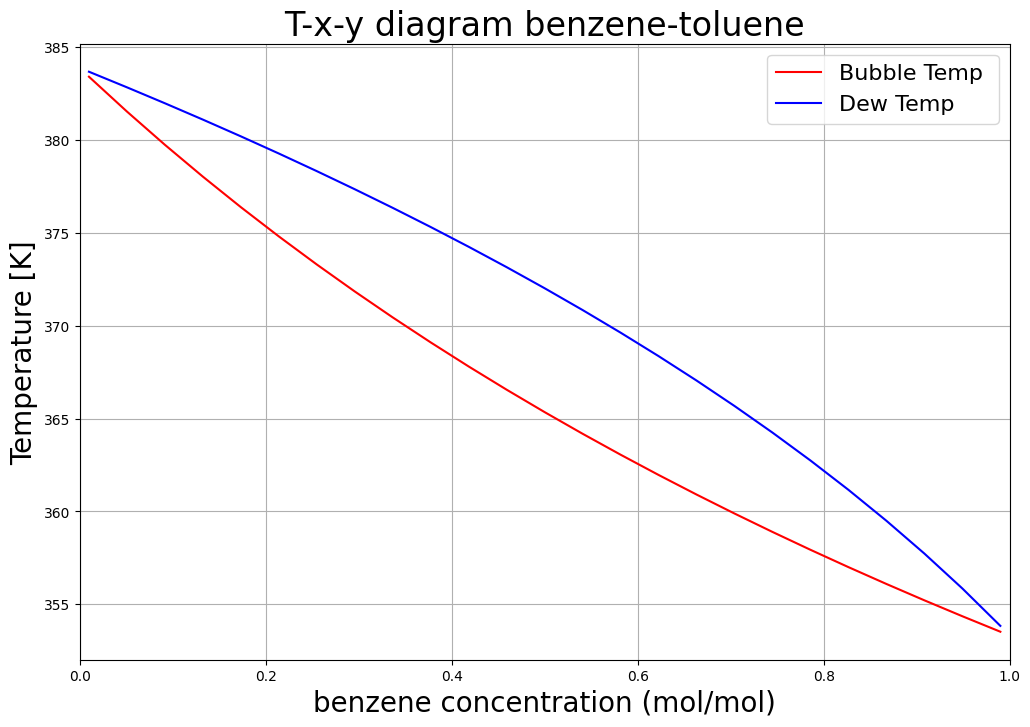

In [7]:
Txy_diagram(
    model,
    "benzene",
    "toluene",
    101325,
    num_points=25,
    temperature=150.15,
    figure_name=None,
    print_legend=True,
    include_pressure=False,
    print_level=idaeslog.CRITICAL,
    solver_op={"tol": 1e-6},
)

You can add precision to the plot by increasing the num_points, include a figure_name in order to save figure in a file or include the pressure in the plot. You can also include more information from the solver by changing the print_level.